In [1]:
import numpy as np
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

In [2]:
def __getnewargs__(self):
 return ((self.endog),(self.k_lags, self.k_diff, self.k_ma))
ARIMA.__getnewargs__ = __getnewargs__

In [3]:
# Load datasets
df_train = pd.read_csv('./dataset/train/2015_2020.csv')
df_test = pd.read_csv('./dataset/test/2022_2023.csv')

df_train = df_train[['KCPL', 'DateTime']].sample(frac=0.01)
df_test = df_test[['KCPL', 'DateTime']].sample(frac=0.01)

df_train.set_index("DateTime", inplace=True)
df_test.set_index("DateTime", inplace=True)

In [4]:
def evaluate_arima(train, test, order):
    history = list(train['KCPL'])
    predictions = []
    for t in range(len(test)):
        model = ARIMA(history, order=order)
        model_fit = model.fit(method='statespace')
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test.iloc[t]['KCPL'])
    return mean_squared_error(test['KCPL'], predictions), mean_absolute_error(test['KCPL'], predictions), predictions, model_fit

In [5]:
p_values = range(0, 3)
d_values = range(0, 2)
q_values = range(0, 3)

best_mse = float('inf')
best_mae = float('inf')
best_oder = None
best_predictions = []

for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p, d, q)
            try:
                mse, mae, prediction, model_fit = evaluate_arima(df_train, df_test, order)
                print(f'Order: {order}, MAE: {mae:.4f}, MSE: {mse:.4f}')
                if mse < best_mse:
                    best_mse = mse
                    best_mae = mae
                    best_oder = order
                    best_predictions = prediction
                    model_fit.save('best-ARIMA-model.pkl')
            except:
                continue
print(f'Best Order: {best_oder}, Best MAE: {best_mae:.4f}, Best MSE: {best_mse:.4f}')

Order: (0, 0, 0), MAE: 350.7518715981497, MSE: 199214.16965107506
Order: (0, 0, 1), MAE: 351.40934269775573, MSE: 199816.33597534097
Order: (0, 0, 2), MAE: 352.3774323313002, MSE: 199556.53333678964
Order: (0, 1, 0), MAE: 533.40190729375, MSE: 454538.7767180839
Order: (0, 1, 1), MAE: 350.69730729216974, MSE: 199227.10010958315
Order: (0, 1, 2), MAE: 351.5061275966551, MSE: 199957.08525877356
Order: (1, 0, 0), MAE: 351.3014840945689, MSE: 199726.69033621927
Order: (1, 0, 1), MAE: 350.3865195721196, MSE: 198682.4164784026
Order: (1, 0, 2), MAE: 352.36203521854543, MSE: 199688.7063818132
Order: (1, 1, 0), MAE: 452.89278957041944, MSE: 325383.9482514014
Order: (1, 1, 1), MAE: 351.3616482839428, MSE: 199845.8144679148
Order: (1, 1, 2), MAE: 354.3592889742493, MSE: 204711.33404362254
Order: (2, 0, 0), MAE: 353.04230092366606, MSE: 199954.47506267522
Order: (2, 0, 1), MAE: 352.7462058064008, MSE: 199987.46438396498


c:\Users\xuzha\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\xuzha\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\xuzha\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\xuzha\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optim

Order: (2, 0, 2), MAE: 355.7801698073288, MSE: 204831.4931275538
Order: (2, 1, 0), MAE: 418.0493293703911, MSE: 280040.3256338136
Order: (2, 1, 1), MAE: 353.04573351903036, MSE: 200045.37601758042


c:\Users\xuzha\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\xuzha\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\xuzha\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\xuzha\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optim

Order: (2, 1, 2), MAE: 8631.615345172982, MSE: 10969009141.342989
Best Order: (1, 0, 1), Best MAE: 350.3865195721196, Best MSE: 198682.4164784026


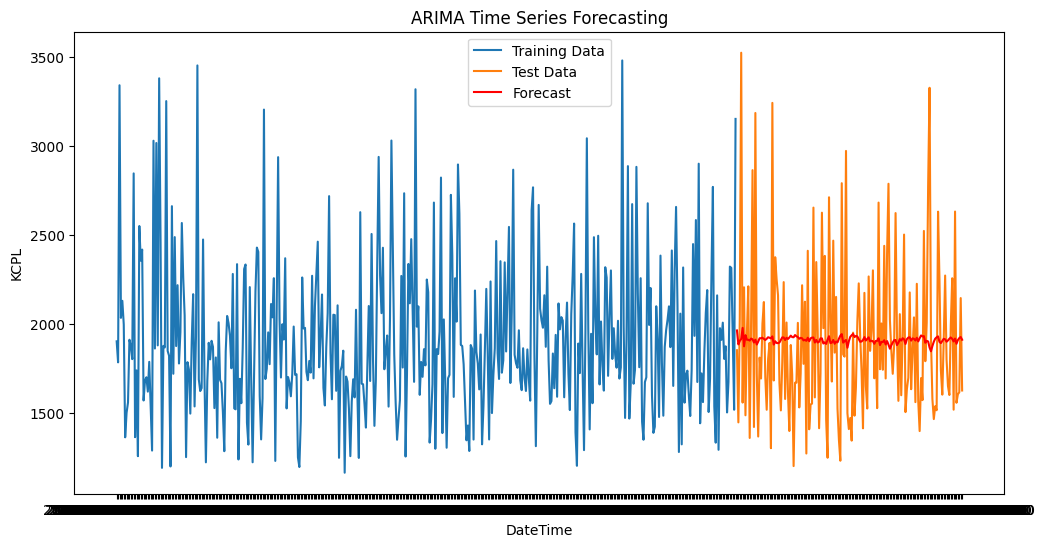

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(df_train.index, df_train['KCPL'], label='Training Data')
plt.plot(df_test.index, df_test['KCPL'], label='Test Data')
plt.plot(df_test.index, best_predictions, label='Forecast', color='red')
plt.title('ARIMA Time Series Forecasting')
plt.xlabel('DateTime')
plt.ylabel('KCPL')
plt.legend()
plt.show()

# Implement LSTM

In [7]:
scaler = MinMaxScaler()
df_train_scaled = scaler.fit_transform(df_train[['KCPL']])
df_test_scaled = scaler.fit_transform(df_test[['KCPL']])

def create_sequences(data, seq_length):
    sequences, labels = [], []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        label = data[i+seq_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

In [15]:
sequence_length = 1

X_train, y_train = create_sequences(df_train_scaled, sequence_length)
X_test, y_test = create_sequences(df_test_scaled, sequence_length)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [16]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [17]:
model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.1, verbose=1)

Epoch 1/20
7/7 [==============================] - 2s 41ms/step - loss: 0.1335 - val_loss: 0.1355
Epoch 2/20
7/7 [==============================] - 0s 7ms/step - loss: 0.1249 - val_loss: 0.1273
Epoch 3/20
7/7 [==============================] - 0s 7ms/step - loss: 0.1172 - val_loss: 0.1199
Epoch 4/20
7/7 [==============================] - 0s 8ms/step - loss: 0.1100 - val_loss: 0.1129
Epoch 5/20
7/7 [==============================] - 0s 7ms/step - loss: 0.1033 - val_loss: 0.1063
Epoch 6/20
7/7 [==============================] - 0s 7ms/step - loss: 0.0968 - val_loss: 0.0998
Epoch 7/20
7/7 [==============================] - 0s 7ms/step - loss: 0.0904 - val_loss: 0.0936
Epoch 8/20
7/7 [==============================] - 0s 7ms/step - loss: 0.0844 - val_loss: 0.0876
Epoch 9/20
7/7 [==============================] - 0s 7ms/step - loss: 0.0786 - val_loss: 0.0818
Epoch 10/20
7/7 [==============================] - 0s 8ms/step - loss: 0.0730 - val_loss: 0.0764
Epoch 11/20
7/7 [=====================

In [18]:
y_pred = model.predict(X_test)

# Invert the scaling for predictions and actual values
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

mse = mean_squared_error(y_test_inv, y_pred_inv)
print(f'Mean Squared Error (MSE): {mse}')

5/5 [==============================] - 0s 1ms/step
Mean Squared Error (RMSE): 224887.90187292913


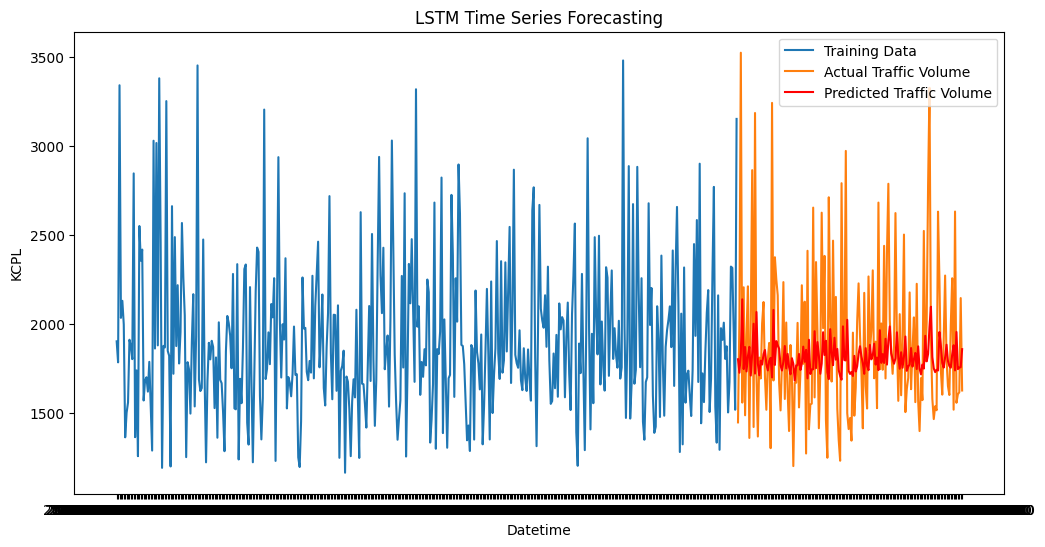

In [22]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df_train.index, df_train['KCPL'], label='Training Data')
plt.plot(df_test.index[sequence_length:], y_test_inv, label='Actual Traffic Volume')
plt.plot(df_test.index[sequence_length:], y_pred_inv, label='Predicted Traffic Volume', color='red')
plt.title('LSTM Time Series Forecasting')
plt.xlabel('Datetime')
plt.ylabel('KCPL')
plt.legend()
plt.show()